# Домашняя работа №1

## NumPy

Все задачи из блока ниже нужно решить, не используя циклов (`for`, `while`, `list comprehension`, `apply`, `np.vectorize`, `np.fromfunction` и так далее, создать новые объекты при помощи встроенноых `numpy` генераторов можно) в реализации. Также для каждой задачи нужно написать проверку: создать какой-то пример, написать для него решение и проверить, что реализованная функция для этого примера возвращает объект, который совпадает с решением. Например:

```python
example = np.eye(5)
solution = 2 * np.eye(5)

result = double_all_elements(example)
assert np.allclose(result, solution)
```

In [113]:
import numpy as np

### Задание 1 (0.5 балла)

Реализуйте функцию, которая из двух векторов $X$ и $Y$ размерности $n$ строит матрицу размерности $(n, 2)$ ($n$ - произвольное)

In [114]:
def concatenate_and_reshape_arrays(array1: np.ndarray, array2: np.ndarray):
    assert len(array1) == len(array2), "lengths does not match"
    return np.concatenate([x.reshape(-1,1), y.reshape(-1,1)], axis = 1)

x = np.array([1,2,3])
y = np.array([6,4,9])
result = concatenate_and_reshape_arrays(x, y)
solution = np.array([[1,6], [2,4], [3, 9]])
assert np.allclose(result, solution)

### Задание 2  (0.5 балла)

Реализуйте функцию, которая для произвольной матрицы $X$ возвращает среднее значение положительных диагональных элементов

In [115]:
def sum_of_positive_elements(matrix: np.ndarray):
    diagonal_without_negative = np.where(X.diagonal() < 0, 0, X.diagonal())
    return np.sum(diagonal_without_negative)
X = np.array([[1, 2, 3],
              [4, -5, 6], 
              [7,8,9]])

result = 10
assert np.allclose(result, sum_of_positive_elements(X))

### Задание 3  (0.5 балла)

Реализуйте функцию, которая для произвольной матрицы $X$ и произвольного числа $k$ заменяет все диагональные элементы матрицы на $k$ (функция не должна ничего возвращать, только модифицировать заданную матрицу)

In [116]:
def change_matrix_with_k(matrix: np.ndarray, k: float):
    np.fill_diagonal(matrix, k)
    return
X = np.array([[1, 2, 3],
              [4, -5, 6], 
              [7,8,9]])
k = 3
result = np.array([[3, 2, 3],
              [4, 3, 6], 
              [7,8,3]])
change_matrix_with_k(X, k)
assert np.allclose(result, X)

### Задание 5  (0.5 балла)

Реализуйте функцию, которая проверяет, являются ли две матрицы $X$ и $Y$ одинаковыми (совпадают размерности и значения), если их преобразовать в вектор построчно (например, для `np.array([[0, 1, 2], [3, 4, 5]])` построчное преобразование в вектор - это `np.array([0, 1, 2, 3, 4, 5])`. 

Функция должна возвращать `True`, если матрицы одинаковые, иначе `False`.

In [117]:
def compare_matrixes(matrix1: np.ndarray, matrix2: np.ndarray):
    if matrix1.shape != matrix2.shape:
        return False
 
    return np.array_equal(matrix1.ravel(), matrix2.ravel())
X = np.array([[1,2,3], [4, 5, 6]])
Y = np.array([[1,2,3], [4, 5, 6]])
result = True
assert np.allclose(compare_matrixes(X, Y), result)
Y = np.array([[2,2,3], [4, 5, 6]])
result = False
assert np.allclose(compare_matrixes(X, Y), result)
Y = np.array(1)
assert np.allclose(compare_matrixes(X, Y), result)

### Задание 4  (1 балл)

Реализуйте функцию, которая для произвольной матрицы $X$ и произвольного числа k возвращает вектор, состоящий из тех значений $x_{ij}$, для которых верно равенство $(i + j) \bmod k = 0$

In [118]:

# не знаю у нас математические или программистские индексы. Возьмем математические (индекс 1 элемента - (1, 1))
def return_values_by_condition(matrix: np.ndarray, k = int):
    matrix_of_indexes = np.outer(np.ones((matrix.shape[1],)), np.arange(1, matrix.shape[0] + 1, 1)) + np.outer(np.arange(1, matrix.shape[1]+1, 1), np.ones((matrix.shape[0],)))
    indices = np.array(np.where(np.mod(matrix_of_indexes, k) == 0, 1,0).nonzero()).T
    idx_j, idx_i = zip(*indices)
    return matrix[idx_i, idx_j]
X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])
k = 5
result = np.array([10, 8, 6])
assert np.allclose(return_values_by_condition(X, k), result)


### Задание 6 (1 балл)

В numpy пропущенное значение (`np.nan`) имеет тип `float`:

In [119]:
type(np.nan)

float

Из-за этого любой числовой массив, содержащий пропущенные значения, будет автоматически иметь тип `float`:

In [120]:
t = np.array([1, 2, 3, np.nan])
t

array([ 1.,  2.,  3., nan])

In [121]:
t.dtype

dtype('float64')

Реализуйте функцию, которая для произвольной матрицы $X$ будет заменять все пропущенные значения на среднее значение в соответствующей строке, округленное до целого. Также эта функция должна поменять тип матрицы с `float` на `int`, если она после этого преобразования состоит только из целых чисел (считаем, что `3.0` - это целое число). В этой задаче можно создать и вернуть новый объект.

In [122]:
def delete_nan(matrix):
    col_mean = np.nanmean(matrix.T, axis=0)
    inds = np.where(np.isnan(matrix.T))
    matrix.T[inds] = np.take(col_mean, inds[1])
    return matrix
X = np.array([[1, 2, np.nan], [np.nan, np.nan, 6], [7, 8, 9], [10, 11, np.nan]])
result = np.array([[1, 2, 1.5], [6, 6, 6], [7, 8, 9], [10, 11, 10.5]]) 
assert np.allclose(delete_nan(X), result)

### Задание 7 (1.5 балла)

С помощью библиотеки `numba` и декоратора `numba.njit` реализуйте функцию, которая для заданной матрицы, состоящей из положительных чисел, выполняет следующее:

1) Все нулевые элементы массива заменяются на случайное целое число от 0 до 100 (без создания копии массива);

2) Возвращает среднее значение квадратных корней элементов матрицы (то есть значение $K = \frac{1}{N\cdot M}\sum_{i=1}^N \sum_{j=1}^M \sqrt{x_{ij}}$);

Сравните скорость работы функции с декоратором и без декоратора. Попробуйте также задать разные значения `parallel` и `fastmath` при использовании декоратора. Опишите, как это влияет на скорость работы и попробуйте предположить, почему получаются такие результаты.

Матрица $X$ задана следующим образом:

Функция без декоратора, работает достаточно быстро

In [123]:
def sqrt_of_matrix(matrix):
    #Мне кажется, в этой строке я не создаю копию массива
    matrix = np.where(matrix == 0, np.random.randint(0, 100), matrix)
    return np.mean(np.sqrt(matrix))/(matrix.shape[0] * matrix.shape[1])
X = np.random.randint(0, 1000, size = (1000, 100))
%time sqrt_of_matrix_with_numba(X)

CPU times: user 288 µs, sys: 173 µs, total: 461 µs
Wall time: 468 µs


0.00021083954787663609

Функция выдает достаточно маленькое значение, хочу проверить на адекватность. Вроде, все правильно. Маленькое значение, так как у нас корень, а потом мы делим на большую размерность матрицы

In [124]:
X = np.array([[1, 2, 3], [4, 5, 6], [7,8,9]])
np.mean(np.sqrt(X))/X.shape[0]/X.shape[1], sqrt_of_matrix(X)

(0.23834568550661392, 0.2383456855066139)

Функция с декоратором, на 1 запуске работает сильно дольше, чем без так как она компилируется в первый раз (насколько я понимаю)

In [125]:


from numba import njit

@njit()
def sqrt_of_matrix_with_numba(matrix):
    #Мне кажется, в этой строке я не создаю копию массива
    matrix = np.where(matrix == 0, np.random.randint(0, 100), matrix)
    return np.mean(np.sqrt(matrix))/(matrix.shape[0] * matrix.shape[1])
X = np.random.randint(0, 1000, size = (1000, 100))
%time sqrt_of_matrix_with_numba(X)

CPU times: user 193 ms, sys: 654 µs, total: 194 ms
Wall time: 193 ms


0.00021084561255871524

теперь без компиляции. Почти в 42 раза быстрее функции без декоратора - неплохо

In [126]:
%time sqrt_of_matrix_with_numba(X)

CPU times: user 465 µs, sys: 0 ns, total: 465 µs
Wall time: 471 µs


0.00021080339961532477

Потыкаемся в parallel и fastmath

In [127]:
@njit(parallel = True)
def sqrt_of_matrix_with_numba(matrix):
    #Мне кажется, в этой строке я не создаю копию массива
    matrix = np.where(matrix == 0, np.random.randint(0, 100), matrix)
    return np.mean(np.sqrt(matrix))/(matrix.shape[0] * matrix.shape[1])
X = np.random.randint(0, 1000, size = (1000, 100))
%time sqrt_of_matrix_with_numba(X)

CPU times: user 613 ms, sys: 284 µs, total: 613 ms
Wall time: 587 ms


0.00021090704428689095

Получается дольше, чем без parallel, как я понимаю, функция достаточно простая и не получается получить профита от распараллеливания

In [128]:
%time sqrt_of_matrix_with_numba(X)

CPU times: user 10.2 ms, sys: 0 ns, total: 10.2 ms
Wall time: 1.66 ms


0.00021091086840869128

In [129]:
@njit(parallel = False)
def sqrt_of_matrix_with_numba(matrix):
    #Мне кажется, в этой строке я не создаю копию массива
    matrix = np.where(matrix == 0, np.random.randint(0, 100), matrix)
    return np.mean(np.sqrt(matrix))/(matrix.shape[0] * matrix.shape[1])
X = np.random.randint(0, 1000, size = (1000, 100))
%time sqrt_of_matrix_with_numba(X)

CPU times: user 220 ms, sys: 1.63 ms, total: 221 ms
Wall time: 210 ms


0.0002107098709838935

Не понимаю почему значение отличается от пустого njit

In [130]:
%time sqrt_of_matrix_with_numba(X)

CPU times: user 298 µs, sys: 165 µs, total: 463 µs
Wall time: 469 µs


0.0002106907149395934

In [131]:
@njit(fastmath = True)
def sqrt_of_matrix_with_numba(matrix):
    #Мне кажется, в этой строке я не создаю копию массива
    matrix = np.where(matrix == 0, np.random.randint(0, 100), matrix)
    return np.mean(np.sqrt(matrix))/(matrix.shape[0] * matrix.shape[1])
X = np.random.randint(0, 1000, size = (1000, 100))
%time sqrt_of_matrix_with_numba(X)

CPU times: user 193 ms, sys: 0 ns, total: 193 ms
Wall time: 193 ms


0.00021044331120268525

In [132]:
%time sqrt_of_matrix_with_numba(X)

CPU times: user 412 µs, sys: 48 µs, total: 460 µs
Wall time: 466 µs


0.00021043426556770168

In [133]:
@njit(fastmath = False)
def sqrt_of_matrix_with_numba(matrix):
    #Мне кажется, в этой строке я не создаю копию массива
    matrix = np.where(matrix == 0, np.random.randint(0, 100), matrix)
    return np.mean(np.sqrt(matrix))/(matrix.shape[0] * matrix.shape[1])
X = np.random.randint(0, 1000, size = (1000, 100))
%time sqrt_of_matrix_with_numba(X)

CPU times: user 195 ms, sys: 0 ns, total: 195 ms
Wall time: 195 ms


0.0002108565714188114

Без фастмат быстрее, скорее всего, здесь недостаточно мат операций, чтобы получить прибавку к скорости. Но мы имеем доп параметр в декораторе, который увеличивает время выполнения

In [134]:
%time sqrt_of_matrix_with_numba(X)

CPU times: user 477 µs, sys: 0 ns, total: 477 µs
Wall time: 484 µs


0.00021086023630686071

$\textbf{Важно:}$ Попробуйте решить задачу без использования циклов. Если не получается сделать решение без циклов, то приведите реализацию с циклами. Подробно опишите полученные результаты, за отсутствие интерпретации будут снижаться баллы.

## Pandas

Для выполнения следующих заданий нам потребуется датасет `iris`:

In [135]:
import pandas as pd
import seaborn as sns

iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Задание 1 (0.25 балла)

Для столбца `sepal_length` посчитайте среднее значение, среднее квадратичное отклонение и медиану по каждому классу из `species`.

In [136]:
iris.groupby(iris['species']).mean(), iris.groupby(iris['species']).var(), iris.groupby(iris['species']).median()

(            sepal_length  sepal_width  petal_length  petal_width
 species                                                         
 setosa             5.006        3.428         1.462        0.246
 versicolor         5.936        2.770         4.260        1.326
 virginica          6.588        2.974         5.552        2.026,
             sepal_length  sepal_width  petal_length  petal_width
 species                                                         
 setosa          0.124249     0.143690      0.030159     0.011106
 versicolor      0.266433     0.098469      0.220816     0.039106
 virginica       0.404343     0.104004      0.304588     0.075433,
             sepal_length  sepal_width  petal_length  petal_width
 species                                                         
 setosa               5.0          3.4          1.50          0.2
 versicolor           5.9          2.8          4.35          1.3
 virginica            6.5          3.0          5.55          2.0)

### Задание 2 (0.25 балла)

Посчитайте количество строк в датасете, которое удовлетворяет условию: `species == 'setosa'` и `sepal_width > 3.2`

In [137]:
len(iris[(iris['species'] == 'setosa') & (iris['sepal_width'] > 3.2)])

33

### Задание 3 (0.5 балла)

Реализуйте функцию, которая возвращает датасет, в котором нет строк с одновременно одинаковыми значениями `sepal_width` и `species`

In [138]:
def delete_same(df):
    return df.drop_duplicates(subset=['species', 'sepal_width'], keep='first')
delete_same(iris)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
8,4.4,2.9,1.4,0.2,setosa
10,5.4,3.7,1.5,0.2,setosa
14,5.8,4.0,1.2,0.2,setosa


### Задание 4 (0.5 балла)

Создайте новую колонку `width_on_length`, в которой значение формируется согласно правилу: 

* если species - `setosa`, то значение равно `sepal_width * sepal_length`; 
* если species - `versicolor`, то значение равно `1.5 * sepal_width * sepal_length / petal_length`;
* иначе `np.nan`

Не знаю можно ли здесь юзать apply, но как это по другому сделать особо идей нет

In [139]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [140]:
iris['width_on_length'] = iris.apply(lambda x: x['sepal_length'] * x['sepal_width'] if x['species'] == 'setosa' 
                                     else(1.5 * x['sepal_length'] * x['sepal_width']/x['petal_length'] if x['species'] == 'versicolor' 
                                          else np.nan), axis = 1)
iris

,sepal_length,sepal_width,petal_length,petal_width,species,width_on_length
0,5.1,3.5,1.4,0.2,setosa,17.85
1,4.9,3.0,1.4,0.2,setosa,14.70
2,4.7,3.2,1.3,0.2,setosa,15.04
3,4.6,3.1,1.5,0.2,setosa,14.26
4,5.0,3.6,1.4,0.2,setosa,18.00
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,NaN
146,6.3,2.5,5.0,1.9,virginica,NaN
147,6.5,3.0,5.2,2.0,virginica,NaN
148,6.2,3.4,5.4,2.3,virginica,NaN


In [141]:
np.NaN

nan

### Задание 5 (0.5 балла)

Реализуйте функцию, которая заполняет пропущенные значения в колонке `width_on_length` случайными `float` значениями от 10 до 30, сортирует строки по значению `width_on_length` по убыванию и после этого перенумеровывает индекс датасета (проверьте, чтобы после этих действий не появилось новых колонок).

In [142]:
iris['width_on_length'] = iris['width_on_length'].apply(lambda x: np.random.uniform(10, 30) if np.isnan(x) else x)
iris = iris.sort_values(by=['width_on_length'], ascending=True).reset_index()
iris

,index,sepal_length,sepal_width,petal_length,petal_width,species,width_on_length
0,60,5.0,2.0,3.5,1.0,versicolor,4.285714
1,68,6.2,2.2,4.5,1.5,versicolor,4.546667
2,53,5.5,2.3,4.0,1.3,versicolor,4.743750
3,83,6.0,2.7,5.1,1.6,versicolor,4.764706
4,72,6.3,2.5,4.9,1.5,versicolor,4.821429
...,...,...,...,...,...,...,...
145,101,5.8,2.7,5.1,1.9,virginica,27.107364
146,131,7.9,3.8,6.4,2.0,virginica,27.728982
147,104,6.5,3.0,5.8,2.2,virginica,27.849772
148,102,7.1,3.0,5.9,2.1,virginica,29.571455


##  Визуализация

В задачах на визуализацию обязательно подписывайте название графиков и осей, иначе будут снижаться баллы.

In [143]:
import seaborn as sns
import matplotlib.pylab as plt

### Задание 1 (0.5 балла)

Визуализируйте распределение width_on_length для каждого класса из `species` с помощью функции `sns.kdeplot` (для каждого класса - свой отдельный график).

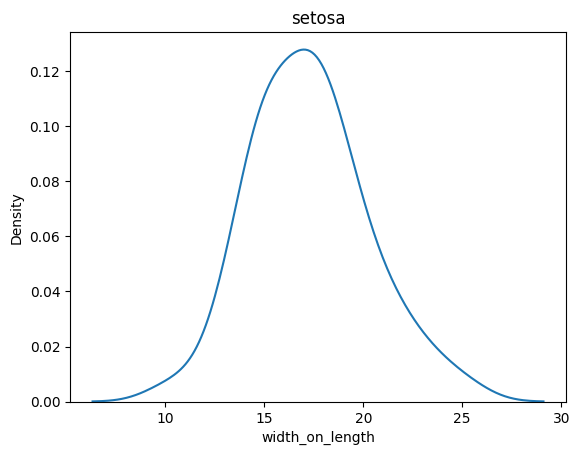

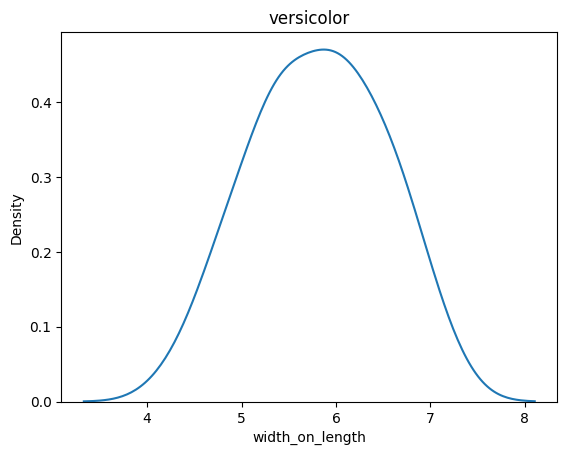

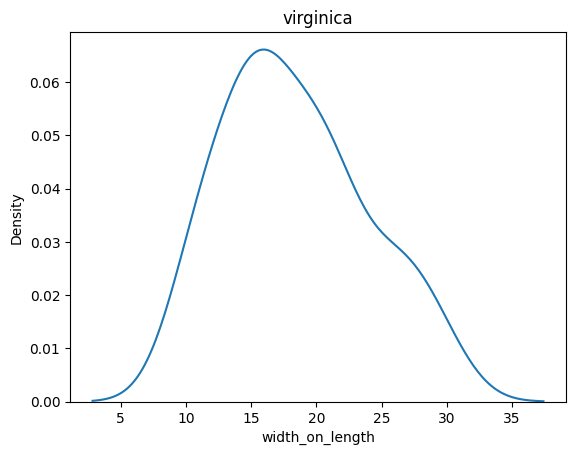

In [144]:
for i in np.unique(iris['species']):
    sns.kdeplot(iris[iris['species'] == i]['width_on_length'])
    plt.title(i)
    plt.show()

### Задание 2 (0.5 балла)

Визуализируйте распределение width_on_length для каждого класса из `species` с помощью функции `sns.boxplot` (все классы изобразите на одном графике).

<AxesSubplot: xlabel='species', ylabel='width_on_length'>

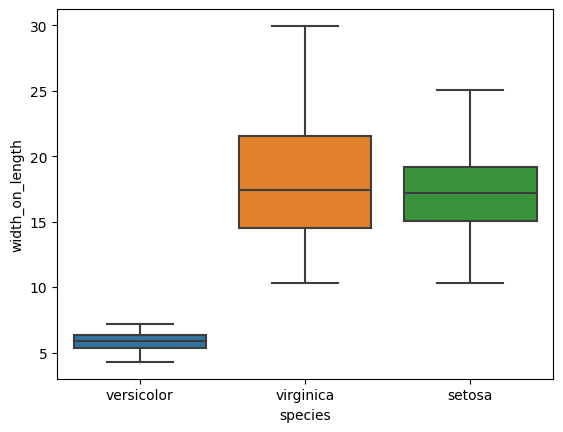

In [145]:
sns.boxplot(x = iris.species, y = iris.width_on_length)

### Задание 3 (0.5 балла)

Постройте график зависимости `sepal_length` от `sepal_width` для класса `setosa` из `species` (в случае дублей в `sepal_width` - найдите среднее `sepal_length` для этого значения `sepal_width` и используйте его для построения графика)

Вот я не уверен, насколько лайнплот использовать правильно. Формально, на дублях выводится среднее

<AxesSubplot: xlabel='sepal_length', ylabel='sepal_width'>

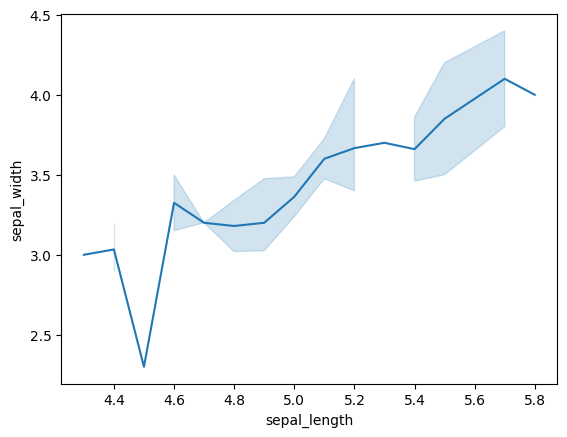

In [146]:
sns.lineplot(data=iris[iris['species'] == 'setosa'], x = "sepal_length", y = 'sepal_width')

### Задание 4 (1 балл)

Визуализируйте средние значения столбцов `sepal_length, sepal_width, petal_length, petal_width` для каждого класса из `species` в виде столбиковой диаграммы из любой библиотеки на ваш выбор, например `sns.barplot` или `pd.DataFrame.plot.bar` (изобразите все на одном графике).

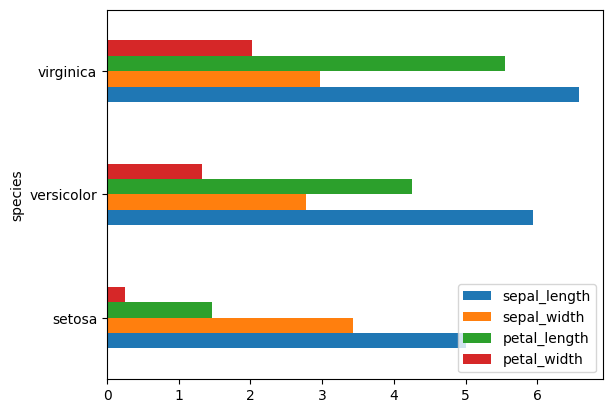

In [147]:
mean_iris = iris.groupby(iris['species']).mean()

mean_iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].plot(kind='barh')
plt.show()
